In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('water.txt', sep='\t', header=0)

In [5]:
df

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15
7,South,Bournemouth,1299,78
8,North,Bradford,1637,10
9,South,Brighton,1359,84


In [6]:
import numpy as np
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [8]:
all_cities = df[['mortality']]
n_cities = df[df.location == 'South'][['mortality']]
s_cities = df[df.location == 'North'][['mortality']]
all_cities

,mortality
0,1247
1,1668
2,1466
3,1800
4,1609
5,1558
6,1807
7,1299
8,1637
9,1359


In [9]:
n_cities

,mortality
0,1247
2,1466
7,1299
9,1359
10,1392
12,1519
13,1307
14,1254
18,1318
19,1260


In [10]:
s_cities

,mortality
1,1668
3,1800
4,1609
5,1558
6,1807
8,1637
11,1755
15,1491
16,1555
17,1428


In [12]:
print(n_cities.shape, s_cities.shape, all_cities.shape)

(26, 1) (35, 1) (61, 1)


In [18]:
ac = np.array(all_cities).reshape((61,))
nc = np.array(n_cities).reshape((26,))
sc = np.array(s_cities).reshape((35,))
print(ac, nc, sc)

[1247 1668 1466 1800 1609 1558 1807 1299 1637 1359 1392 1755 1519 1307
 1254 1491 1555 1428 1318 1260 1723 1379 1742 1574 1569 1096 1591 1402
 1772 1828 1704 1702 1581 1309 1259 1427 1724 1175 1486 1456 1696 1236
 1711 1444 1591 1987 1495 1369 1257 1587 1713 1557 1640 1709 1625 1625
 1527 1627 1486 1485 1378] [1247 1466 1299 1359 1392 1519 1307 1254 1318 1260 1096 1402 1581 1309
 1259 1175 1486 1456 1236 1369 1257 1625 1527 1627 1486 1485] [1668 1800 1609 1558 1807 1637 1755 1491 1555 1428 1723 1379 1742 1574
 1569 1591 1772 1828 1704 1702 1427 1724 1696 1711 1444 1591 1987 1495
 1587 1713 1557 1640 1709 1625 1378]


In [22]:
print(_tconfint_generic(ac.mean(), ac.std(ddof=1)/np.sqrt(len(ac)), len(ac) - 1, 0.05, 'two-sided'))

(1476.0833413552848, 1572.2117406119285)


In [23]:
print(_tconfint_generic(sc.mean(), sc.std(ddof=1)/np.sqrt(len(sc)), len(sc) - 1, 0.05, 'two-sided'))

(1586.5605251961385, 1680.6394748038613)


In [24]:
print(_tconfint_generic(nc.mean(), nc.std(ddof=1)/np.sqrt(len(nc)), len(nc) - 1, 0.05, 'two-sided'))

(1320.1517462936238, 1433.463638321761)


In [25]:
nch = np.array(df[df.location == 'South'][['hardness']]).reshape((26,))
sch = np.array(df[df.location == 'North'][['hardness']]).reshape((35,))
print(nch, sch)

[105   5  78  84  73  21  78  96 122  21 138  37  14  59 133 107   5  90
 101  68  50  13  60  53 122  81] [17 14 18 10 15 10 12 20 39 39 44 94  8  9 91 16 15  8 26 44 27  6  6 13
 14 49  8 14 75 71 13 57 71 20 71]


In [26]:
print(_tconfint_generic(nch.mean(), nch.std(ddof=1)/np.sqrt(len(nch)), len(nch) - 1, 0.05, 'two-sided'))

(53.467198692036106, 86.07126284642544)


In [27]:
print(_tconfint_generic(sch.mean(), sch.std(ddof=1)/np.sqrt(len(sch)), len(sch) - 1, 0.05, 'two-sided'))

(21.42248728572426, 39.37751271427574)


In [30]:
x = 100202932
n = 1
while x > 0.1:
    x = _zconfint_generic(0, 1/np.sqrt(n), 0.05, 'two-sided')[1]
    print("n = {} : x = {}".format(n, x))
    n += 1

n = 1 : x = 1.959963984540054
n = 2 : x = 1.3859038243496777
n = 3 : x = 1.131585734076172
n = 4 : x = 0.979981992270027
n = 5 : x = 0.8765225405765815
n = 6 : x = 0.8001519460592185
n = 7 : x = 0.7407967545337466
n = 8 : x = 0.6929519121748389
n = 9 : x = 0.653321328180018
n = 10 : x = 0.6197950323045616
n = 11 : x = 0.5909513763026628
n = 12 : x = 0.565792867038086
n = 13 : x = 0.543596203409375
n = 14 : x = 0.5238224086117986
n = 15 : x = 0.5060605247526639
n = 16 : x = 0.4899909961350135
n = 17 : x = 0.47536109003912363
n = 18 : x = 0.46196794144989267
n = 19 : x = 0.44964657587312684
n = 20 : x = 0.43826127028829076
n = 21 : x = 0.4276992056448598
n = 22 : x = 0.41786572553513607
n = 23 : x = 0.40868074180933894
n = 24 : x = 0.40007597302960923
n = 25 : x = 0.3919927969080108
n = 26 : x = 0.3843805616580309
n = 27 : x = 0.37719524469205723
n = 28 : x = 0.3703983772668733
n = 29 : x = 0.3639561749240074
n = 30 : x = 0.35783882874343137
n = 31 : x = 0.3520199234049176
n = 32 : x = 0

In [31]:
import scipy

In [33]:
p = 1 / 50
z = scipy.stats.norm.ppf(1 - 0.05 / 2)
print(p + z * np.sqrt(p*(1-p) / 50))
print(p - z * np.sqrt(p*(1-p) / 50))

0.05880530708179098
-0.018805307081790974


In [34]:
from statsmodels.stats.proportion import proportion_confint

normal_interval = proportion_confint(1, 50, method = 'normal')
print(normal_interval)
wilson_interval = proportion_confint(1, 50, method = 'wilson')
print(wilson_interval)

(0.0, 0.05880530708179099)
(0.003539259271646236, 0.10495443589637815)


In [35]:
n = scipy.stats.norm.ppf(1 - 0.05/2) /  0.01 * np.sqrt(0.02 * 0.98)

In [42]:

print(n ** 2)

752.9259288560485


In [37]:
from matplotlib import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/sysak_ma/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


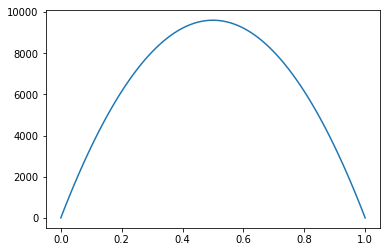

In [43]:
x = np.linspace(0, 1, 100)
y = [(z / 0.01 * np.sqrt(p * (1 - p))) ** 2 for p in x]
plt.plot(x, y)
plt.show()

In [39]:
z / 0.01 * 0.5

97.9981992270027

In [40]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [41]:
samplesize_confint_proportion(0.02, 0.01)

752.9259288560489

In [44]:
samplesize_confint_proportion(0.5, 0.01)

9603.647051735317

In [45]:
scipy.stats.norm.ppf(1 - 0.003 / 2)

2.9677379253417944

In [46]:
189 / 11034 - 104 / 11037

0.0077060239760047815

In [47]:
p1 = 189/11034
p2 = 104/11037
z = scipy.stats.norm.ppf(1 - 0.05 / 2)
interval_u = p1 - p2 + z * np.sqrt(p1 * (1 - p1) / 11034 + p2 * (1 - p2) / 11037)
interval_l = p1 - p2 - z * np.sqrt(p1 * (1 - p1) / 11034 + p2 * (1 - p2) / 11037)

In [48]:
print(interval_l, interval_u)

0.004687750675049439 0.010724297276960124


In [49]:
189 / (11034 - 189) * (11037 - 104) / 104

1.8320539419087136

In [58]:
np.random.seed(0)

In [59]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [60]:
asp = [1] *  104 + [0] * (11037 - 104)
plac = [1] * 189 + [0] * (11034 - 189)

In [61]:
asp_s = get_bootstrap_samples(np.array(asp), 1000)
plac_s = get_bootstrap_samples(np.array(plac), 1000)

In [73]:
def get_odds_relation(x):
    p1 = x[0].mean()
    p2 = x[1].mean()
    return p1 / (1 - p1) * (1 - p2) / p2

In [67]:
stats = np.array(map(get_odds_relation, list(zip(plac_s, asp_s))))

In [74]:
[get_odds_relation(x) for x in list(zip(plac_s, asp_s))]

[1.660043787221006,
 1.766030085786543,
 1.9655216665953714,
 2.104598706067494,
 1.6939097864067907,
 1.607534197744018,
 1.7956422507922432,
 2.0633574551484997,
 1.5463617042809434,
 1.8730773793048912,
 1.4856279179231433,
 1.659230942438385,
 1.3974141603721444,
 2.0608281672774598,
 2.2406954441790266,
 1.6687061773888119,
 1.95891147156537,
 1.7391964611567376,
 1.6438582139500924,
 1.5441351098530933,
 1.6329492118967635,
 1.7488079297452395,
 1.7610364724645,
 1.9348165598527811,
 2.0398169969218927,
 1.8454085489968013,
 1.6428592221704703,
 1.800238020670216,
 1.6353129226607646,
 1.597607101858246,
 1.7534714804528948,
 2.152833379539784,
 1.6291815695350307,
 1.8784119585309007,
 1.9541102046460177,
 1.6344724960770247,
 1.7911146707769128,
 2.0398683344305466,
 1.8118854190242202,
 1.4871643260361795,
 2.0593698022546665,
 1.6090470483390187,
 1.7625702182521412,
 2.0072679624372136,
 1.8898607676897214,
 1.8445037323748967,
 1.7915444327246357,
 1.6389158480293526,
 1.53

In [76]:
stat_intervals([get_odds_relation(x) for x in list(zip(plac_s, asp_s))], 0.05)

array([1.44419465, 2.34321168])